In [137]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import os
from glob import glob
import scipy.stats as st
from scipy.stats import linregress

output_data_file = "output_data/pverty.csv"

In [113]:
#Reference the file where the CSV is located
poverty_path= "../Resources/poverty_stats.csv"

#Import the data into a pandas DataFrame
poverty_df=pd.read_csv(poverty_path, encoding= "UTF-8")
poverty_df

,Year,State FIPS,Postal Code,Name,Poverty Estimate All Ages,90% CI Lower Bound,90% CI Upper Bound,Poverty Percent All Ages,90% CI Lower Bound.1,90% CI Upper Bound.1,...,90% CI Upper Bound.5,Median Household Income,90% CI Lower Bound.6,90% CI Upper Bound.6,Poverty Estimate Ages 0-4,90% CI Lower Bound.7,90% CI Upper Bound.7,Poverty Percent Ages 0-4,90% CI Lower Bound.8,90% CI Upper Bound.8
0,2003,0,US,United States,"35,861,170","35,190,401","36,531,939",12.5,12.2,12.7,...,16.6,"43,318","43,009","43,627","4,021,366","3,817,517","4,225,215",20.3,19.3,21.4
1,2003,1,AL,Alabama,"677,455","644,647","710,263",15.3,14.5,16.0,...,22.5,"36,131","34,659","37,602","72,477","62,361","82,594",24.7,21.3,28.2
2,2003,2,AK,Alaska,"63,126","58,920","67,332",9.8,9.2,10.5,...,12.0,"52,391","50,764","54,018","7,651","6,153","9,148",15.6,12.5,18.6
3,2003,4,AZ,Arizona,"783,005","736,508","829,502",13.9,13.1,14.7,...,21.8,"41,963","40,557","43,368","92,147","75,773","108,522",20.9,17.2,24.7
4,2003,5,AR,Arkansas,"432,240","410,707","453,774",16.0,15.2,16.8,...,23.4,"33,445","31,994","34,895","49,523","42,786","56,260",27.2,23.5,30.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,2020,51,VA,Virginia,"769,479","747,641","791,317",9.2,8.9,9.5,...,12.0,"79,154","78,336","79,972","67,255","61,585","72,925",13.7,12.5,14.9
932,2020,53,WA,Washington,"714,653","692,072","737,234",9.5,9.2,9.8,...,10.9,"80,319","79,334","81,304","53,387","47,813","58,961",12.2,10.9,13.5
933,2020,54,WV,West Virginia,"274,176","264,703","283,649",15.8,15.3,16.3,...,20.2,"49,202","48,077","50,327","19,960","18,165","21,755",22.8,20.7,24.9
934,2020,55,WI,Wisconsin,"571,049","554,353","587,745",10.0,9.7,10.3,...,12.1,"64,901","64,276","65,526","45,185","41,504","48,866",14.2,13.0,15.4


In [114]:
poverty_df.columns

Index(['Year', 'State FIPS', 'Postal Code', 'Name',
       'Poverty Estimate All Ages', '90% CI Lower Bound', '90% CI Upper Bound',
       'Poverty Percent All Ages', '90% CI Lower Bound.1',
       '90% CI Upper Bound.1', 'Poverty Estimate Ages 0-17',
       '90% CI Lower Bound.2', '90% CI Upper Bound.2',
       'Poverty Percent Ages 0-17', '90% CI Lower Bound.3',
       '90% CI Upper Bound.3', 'Poverty Estimate Ages 5-17',
       '90% CI Lower Bound.4', '90% CI Upper Bound.4',
       'Poverty Percent Ages 5-17', '90% CI Lower Bound.5',
       '90% CI Upper Bound.5', 'Median Household Income',
       '90% CI Lower Bound.6', '90% CI Upper Bound.6',
       'Poverty Estimate Ages 0-4', '90% CI Lower Bound.7',
       '90% CI Upper Bound.7', 'Poverty Percent Ages 0-4',
       '90% CI Lower Bound.8', '90% CI Upper Bound.8'],
      dtype='object')

In [115]:
reduced_poverty_df=poverty_df.loc[:, ["Year", "State FIPS", "Postal Code", "Name","Poverty Percent All Ages", 
                                      "Median Household Income","Poverty Estimate Ages 5-17", "Poverty Percent Ages 5-17",
                                     ]]
reduced_poverty_df.head()

,Year,State FIPS,Postal Code,Name,Poverty Percent All Ages,Median Household Income,Poverty Estimate Ages 5-17,Poverty Percent Ages 5-17
0,2003,0,US,United States,12.5,"43,318","8,399,573",16.1
1,2003,1,AL,Alabama,15.3,"36,131","165,578",21.0
2,2003,2,AK,Alaska,9.8,"52,391","14,330",10.7
3,2003,4,AZ,Arizona,13.9,"41,963","213,295",19.8
4,2003,5,AR,Arkansas,16.0,"33,445","105,100",21.7


In [116]:
reduced_poverty_df=reduced_poverty_df.loc[(reduced_poverty_df["State FIPS"]==0)]
# reduced_poverty_df.set_index("Year", inplace=True)
reduced_poverty_df.head()

,Year,State FIPS,Postal Code,Name,Poverty Percent All Ages,Median Household Income,Poverty Estimate Ages 5-17,Poverty Percent Ages 5-17
0,2003,0,US,United States,12.5,"43,318","8,399,573",16.1
52,2004,0,US,United States,12.7,"44,334","8,430,886",16.2
104,2005,0,US,United States,13.3,46242,8765541,17.0
156,2006,0,US,United States,13.3,48451,8700048,16.7
208,2007,0,US,United States,13.0,50740,8499844,16.4


In [117]:
# national_stats=reduced_poverty_df[reduced_poverty_df["State FIPS"]==0]
# national_stats.head()


In [131]:
clean_data=poverty_df[~poverty_df["State FIPS"].isin(national_stats["State FIPS"])]
clean_data

,Year,State FIPS,Postal Code,Name,Poverty Estimate All Ages,90% CI Lower Bound,90% CI Upper Bound,Poverty Percent All Ages,90% CI Lower Bound.1,90% CI Upper Bound.1,...,90% CI Upper Bound.5,Median Household Income,90% CI Lower Bound.6,90% CI Upper Bound.6,Poverty Estimate Ages 0-4,90% CI Lower Bound.7,90% CI Upper Bound.7,Poverty Percent Ages 0-4,90% CI Lower Bound.8,90% CI Upper Bound.8
1,2003,1,AL,Alabama,"677,455","644,647","710,263",15.3,14.5,16.0,...,22.5,"36,131","34,659","37,602","72,477","62,361","82,594",24.7,21.3,28.2
2,2003,2,AK,Alaska,"63,126","58,920","67,332",9.8,9.2,10.5,...,12.0,"52,391","50,764","54,018","7,651","6,153","9,148",15.6,12.5,18.6
3,2003,4,AZ,Arizona,"783,005","736,508","829,502",13.9,13.1,14.7,...,21.8,"41,963","40,557","43,368","92,147","75,773","108,522",20.9,17.2,24.7
4,2003,5,AR,Arkansas,"432,240","410,707","453,774",16.0,15.2,16.8,...,23.4,"33,445","31,994","34,895","49,523","42,786","56,260",27.2,23.5,30.9
5,2003,6,CA,California,"4,836,106","4,639,930","5,032,283",13.7,13.2,14.3,...,20.1,"48,440","47,147","49,734","520,311","461,424","579,197",20.0,17.8,22.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,2020,51,VA,Virginia,"769,479","747,641","791,317",9.2,8.9,9.5,...,12.0,"79,154","78,336","79,972","67,255","61,585","72,925",13.7,12.5,14.9
932,2020,53,WA,Washington,"714,653","692,072","737,234",9.5,9.2,9.8,...,10.9,"80,319","79,334","81,304","53,387","47,813","58,961",12.2,10.9,13.5
933,2020,54,WV,West Virginia,"274,176","264,703","283,649",15.8,15.3,16.3,...,20.2,"49,202","48,077","50,327","19,960","18,165","21,755",22.8,20.7,24.9
934,2020,55,WI,Wisconsin,"571,049","554,353","587,745",10.0,9.7,10.3,...,12.1,"64,901","64,276","65,526","45,185","41,504","48,866",14.2,13.0,15.4


In [132]:
reduced_poverty_df.head()


,Year,State FIPS,Postal Code,Name,Poverty Percent All Ages,Median Household Income,Poverty Estimate Ages 5-17,Poverty Percent Ages 5-17
0,2003,0,US,United States,12.5,"43,318","8,399,573",16.1
52,2004,0,US,United States,12.7,"44,334","8,430,886",16.2
104,2005,0,US,United States,13.3,46242,8765541,17.0
156,2006,0,US,United States,13.3,48451,8700048,16.7
208,2007,0,US,United States,13.0,50740,8499844,16.4


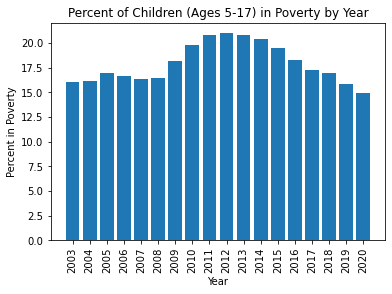

In [147]:
# counts=reduced_poverty_df["Poverty Percent Ages 5-17"].values()
x_values = reduced_poverty_df["Year"]
y_values=reduced_poverty_df["Poverty Percent Ages 5-17"]
labels=["2003","2004","2005","2006","2007","2008","2009","2010",
        "2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"]
plt.bar(x_values, y_values)
plt.xlabel("Year")
plt.xticks(x_values, labels, rotation='vertical')
plt.ylabel("Percent in Poverty")
plt.title("Percent of Children (Ages 5-17) in Poverty by Year")
plt.savefig("../Resources/bar_graph_all_years")
plt.show()

In [141]:
# # Calculate the correlation coefficient and linear regression model 
# print(f"The correlation coefficient between year and poverty percent \nfor 5-17 year olds is {round(st.pearsonr(x_values, y_values)[0],2)}")


# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values, y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(20,36),fontsize=15,color="red")
# plt.xlabel("Year")
# plt.ylabel("Poverty Percent")
# plt.title("Percent of Children (Ages 5-17) in Poverty by Year")
# plt.show()

-The bar graph above shows that the year 2012 had the highest percent in poverty wtihin the age group of 5-17 year olds across the United States. 

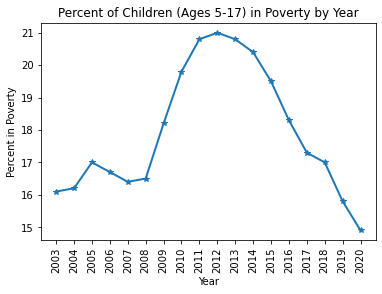

In [145]:
# x_values = national_stats["Year"]
plt.rc('lines', linewidth=2, linestyle='-', marker='*')
labels=["2003","2004","2005","2006","2007","2008","2009","2010",
        "2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"]
plt.plot(x_values, y_values)
plt.xticks(x_values, labels, rotation='vertical')
plt.xlabel("Year")
plt.ylabel("Percent in Poverty")
plt.title("Percent of Children (Ages 5-17) in Poverty by Year")
plt.savefig("../Resources/line_graph_yearvpoverty")
plt.show()


In [143]:
national_stats=reduced_poverty_df.loc[(reduced_poverty_df["State FIPS"]==0)]
national_stats.set_index("Year", inplace=True)
national_stats.head()

,State FIPS,Postal Code,Name,Poverty Percent All Ages,Median Household Income,Poverty Estimate Ages 5-17,Poverty Percent Ages 5-17
Year,,,,,,,
2003,0,US,United States,12.5,"43,318","8,399,573",16.1
2004,0,US,United States,12.7,"44,334","8,430,886",16.2
2005,0,US,United States,13.3,46242,8765541,17.0
2006,0,US,United States,13.3,48451,8700048,16.7
2007,0,US,United States,13.0,50740,8499844,16.4


In [124]:
# Put treatments into a list for for loop (and later for plot labels)
year=[2005, 2010, 2015, 2020]

# Create empty list to fill with poverty percent (for plotting)
percent=[]

for x in year:
    year_percent=reduced_poverty_df.loc[reduced_poverty_df["Year"]==x,"Poverty Percent Ages 5-17"]
    percent.append(year_percent)
    
percent

[104    17.0
 Name: Poverty Percent Ages 5-17, dtype: float64,
 364    19.8
 Name: Poverty Percent Ages 5-17, dtype: float64,
 624    19.5
 Name: Poverty Percent Ages 5-17, dtype: float64,
 884    14.9
 Name: Poverty Percent Ages 5-17, dtype: float64]

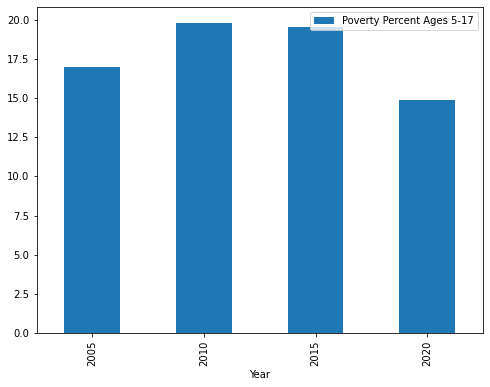

In [146]:
national_stats.loc[year].plot(y="Poverty Percent Ages 5-17", kind="bar", figsize=(8,6))
plt.savefig("../Resources/bar_year")

In [126]:
reduced_poverty_df.to_csv("poverty_csv", index=False, header=True)

In [148]:
clean_data

,Year,State FIPS,Postal Code,Name,Poverty Estimate All Ages,90% CI Lower Bound,90% CI Upper Bound,Poverty Percent All Ages,90% CI Lower Bound.1,90% CI Upper Bound.1,...,90% CI Upper Bound.5,Median Household Income,90% CI Lower Bound.6,90% CI Upper Bound.6,Poverty Estimate Ages 0-4,90% CI Lower Bound.7,90% CI Upper Bound.7,Poverty Percent Ages 0-4,90% CI Lower Bound.8,90% CI Upper Bound.8
1,2003,1,AL,Alabama,"677,455","644,647","710,263",15.3,14.5,16.0,...,22.5,"36,131","34,659","37,602","72,477","62,361","82,594",24.7,21.3,28.2
2,2003,2,AK,Alaska,"63,126","58,920","67,332",9.8,9.2,10.5,...,12.0,"52,391","50,764","54,018","7,651","6,153","9,148",15.6,12.5,18.6
3,2003,4,AZ,Arizona,"783,005","736,508","829,502",13.9,13.1,14.7,...,21.8,"41,963","40,557","43,368","92,147","75,773","108,522",20.9,17.2,24.7
4,2003,5,AR,Arkansas,"432,240","410,707","453,774",16.0,15.2,16.8,...,23.4,"33,445","31,994","34,895","49,523","42,786","56,260",27.2,23.5,30.9
5,2003,6,CA,California,"4,836,106","4,639,930","5,032,283",13.7,13.2,14.3,...,20.1,"48,440","47,147","49,734","520,311","461,424","579,197",20.0,17.8,22.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,2020,51,VA,Virginia,"769,479","747,641","791,317",9.2,8.9,9.5,...,12.0,"79,154","78,336","79,972","67,255","61,585","72,925",13.7,12.5,14.9
932,2020,53,WA,Washington,"714,653","692,072","737,234",9.5,9.2,9.8,...,10.9,"80,319","79,334","81,304","53,387","47,813","58,961",12.2,10.9,13.5
933,2020,54,WV,West Virginia,"274,176","264,703","283,649",15.8,15.3,16.3,...,20.2,"49,202","48,077","50,327","19,960","18,165","21,755",22.8,20.7,24.9
934,2020,55,WI,Wisconsin,"571,049","554,353","587,745",10.0,9.7,10.3,...,12.1,"64,901","64,276","65,526","45,185","41,504","48,866",14.2,13.0,15.4


In [149]:
clean_data.to_csv("poverty_by_state_csv", index=False, header=True)